In [1]:
!pip install tensorflow keras opencv-python matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess dataset
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    'C:/Users/geonk/OneDrive/Documents/data',
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    'C:/Users/geonk/OneDrive/Documents/data',
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

# CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, validation_data=val_data, epochs=10)

# Save the model
model.save("cricket_shot_classifier.h5")

Found 3779 images belonging to 4 classes.
Found 944 images belonging to 4 classes.


C:\Users\geonk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\geonk\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 61s 501ms/step - accuracy: 0.4640 - loss: 2.8553 - val_accuracy: 0.5784 - val_loss: 1.1178
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 58s 485ms/step - accuracy: 0.8876 - loss: 0.3407 - val_accuracy: 0.6324 - val_loss: 1.0852
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 58s 487ms/step - accuracy: 0.9698 - loss: 0.1160 - val_accuracy: 0.6409 - val_loss: 1.3464
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 56s 470ms/step - accuracy: 0.9927 - loss: 0.0373 - val_accuracy: 0.6070 - val_loss: 1.8271
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 56s 474ms/step - accuracy: 0.9964 - loss: 0.0248 - val_accuracy: 0.6589 - val_loss: 2.2776
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 55s 458ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.6536 - val_loss: 2.3753
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 54s 457ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.6483 - val_loss: 2.6795
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 55s 459ms/step - accuracy: 1.0000 - loss: 3

Testing without visualization


In [5]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load trained model
model = load_model("cricket_shot_classifier.h5")

# Class labels (must match your dataset folders)
class_names = ['cover_drive', 'pull_shot', 'cut_shot', 'sweep', 'lofted_shot']

# Load input image
img_path = "C:/Users/geonk/OneDrive/Documents/cover_drive_img.webp"
image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0) / 255.0

# Predict
pred = model.predict(image)
predicted_class = class_names[np.argmax(pred)]

print(f"Predicted Cricket Shot: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Cricket Shot: pull_shot


Training Images

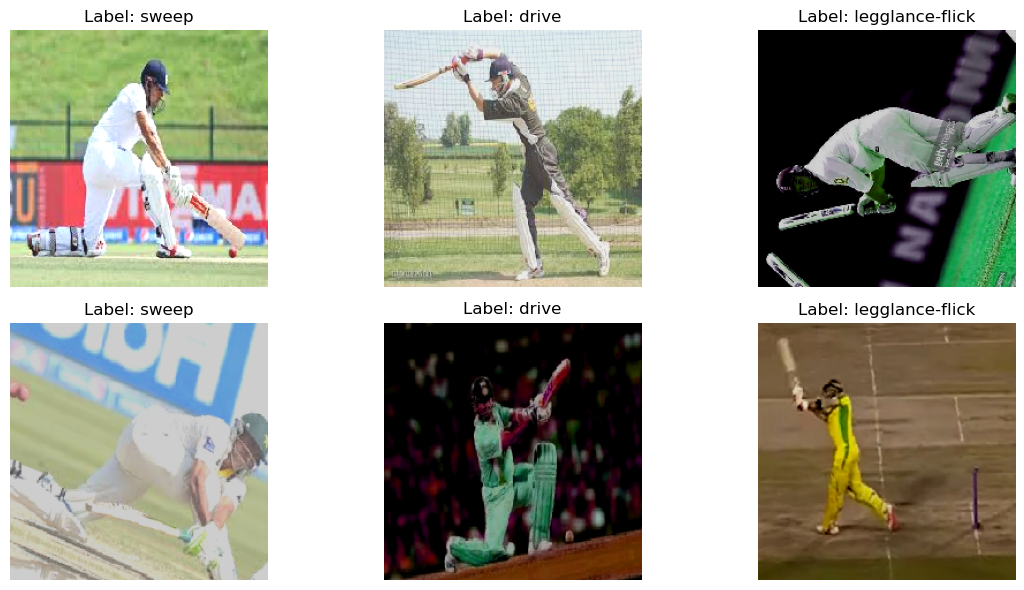

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Show some training images with labels
def show_training_images(data_gen, num_images=6):
    images, labels = next(data_gen)  # Get one batch of images
    class_names = list(data_gen.class_indices.keys())
    
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i])
        label_index = np.argmax(labels[i])
        plt.title(f"Label: {class_names[label_index]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call this after loading train_data
show_training_images(train_data)


Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


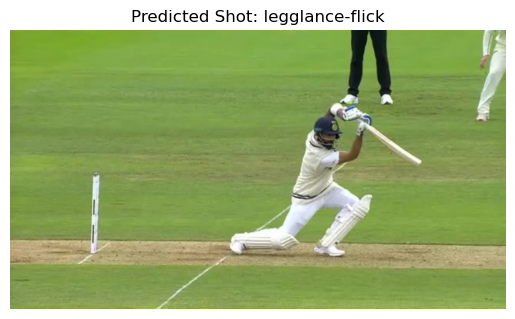

In [11]:
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Load trained model
model = load_model("cricket_shot_classifier.h5")

# Class names (match folder names)
class_names = list(train_data.class_indices.keys())

# Show and classify a single image
def show_test_prediction(img_path):
    image = cv2.imread(img_path)
    image_resized = cv2.resize(image, (224, 224))
    image_array = img_to_array(image_resized)
    image_array = np.expand_dims(image_array, axis=0) / 255.0

    prediction = model.predict(image_array)
    predicted_label = class_names[np.argmax(prediction)]

    # Show original image with predicted label
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Shot: {predicted_label}")
    plt.axis('off')
    plt.show()

# Example usage:
show_test_prediction(r"C:/Users/geonk/OneDrive/Documents/cover_drive_img.webp")
